<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:##45a8cc">Case Study 1<span style="font-family: Arial; font-weight:bold;font-size:0.9em;color:###d39219">(House Prices)

Data fields
Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.1 import some necessary librairies

In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 
from scipy import stats
from scipy.stats import norm, skew
from subprocess import check_output


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.2 import and put the train and test datasets in  pandas dataframe

In [57]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.3 display the first five rows of the train dataset.

In [58]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.4 display the first five rows of the test dataset.

In [59]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.5 check the numbers of samples and features

In [60]:

print("The Train: {} ".format(train.shape))
print("The test: {} ".format(test.shape))


The Train: (1460, 81) 
The test: (1459, 80) 


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.6 Save the 'Id' column

In [61]:

train_ID = train['Id']
test_ID = test['Id']


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.7 Now drop the  'Id' colum since it's unnecessary for  the prediction process.

In [62]:

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.8 check again the data size after dropping the 'Id' variable

In [63]:

print("\nThe train : {} ".format(train.shape)) 
print("The test : {} ".format(test.shape))


The train : (1460, 80) 
The test : (1459, 79) 


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.9 Data Processing

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##45a8cc"> 1.9a)Scatter plot to check the Outliers for GrLivArea Vs SalePrice.And your observation?

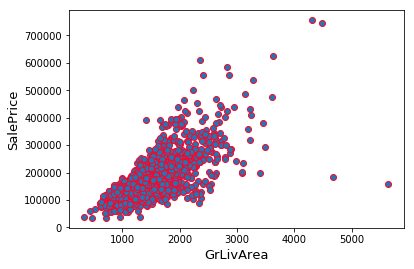

In [64]:
# create subplots
fig, ax = plt.subplots()
#create scatter plots
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'],edgecolors='#fc052a')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:##45a8cc"> observation:
1. the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. 

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##45a8cc"> 1.9 b) Deleting outliers.And your observation?

In [65]:

train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)


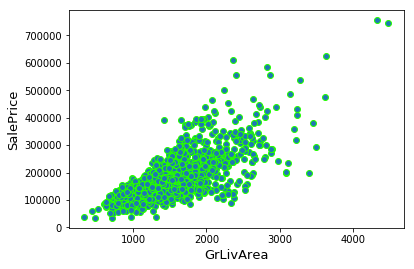

In [66]:
#Check the graphic again
fig, ax = plt.subplots()
#create scatterplot
ax.scatter(train['GrLivArea'], train['SalePrice'],edgecolors='#26ff00')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##45a8cc"> observation:
    1. We deleted the bottom of two outliers.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##45a8cc"> 1.9 c)Check the Outliers in box plot  for train['GrLivArea'].And your observation?

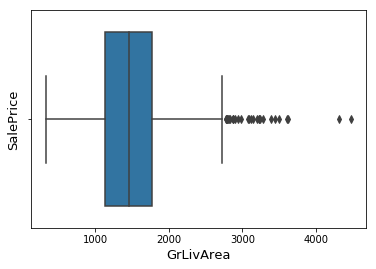

In [67]:
# create subplots
fig, ax = plt.subplots()
#create scatter plots
sns.boxplot( x = train['GrLivArea'])

plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [71]:

train = train.drop(train[(train['GrLivArea']>2600)].index)


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##45a8cc"> 1.9 d)Check Again the Outliers in box plot  for train['GrLivArea'].And your observation?

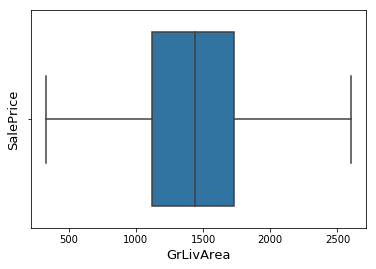

In [73]:
# create subplots
fig, ax = plt.subplots()
#create scatter plots
sns.boxplot( x = train['GrLivArea'])

plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.10 Checking the skeweness for saleprice.And your observation?


 mu = 180932.92 and sigma = 79467.79



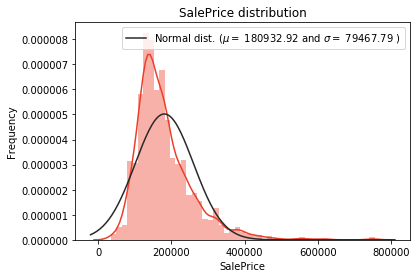

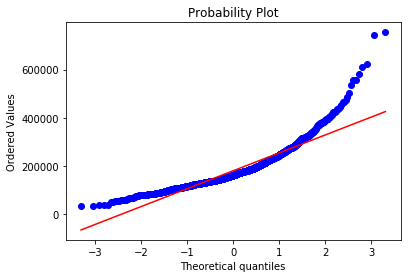

In [46]:
sns.distplot(train['SalePrice'] , fit=norm,color='#ed3e2a');

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:##45a8cc"> observation:
1. The target variable is right skewed.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##45a8cc"> 1.10 a) Apply Log-transformation of the target variable.And your observation?

In [47]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])


 mu = 12.02 and sigma = 0.40



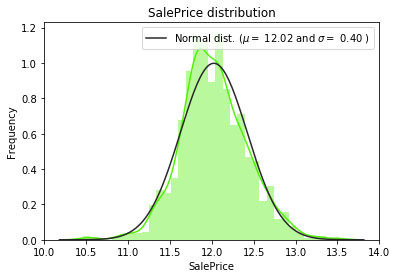

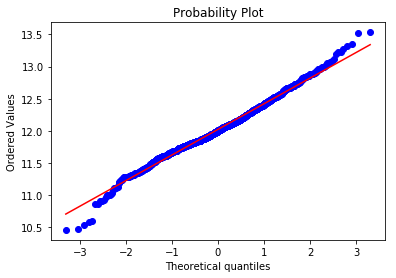

In [48]:
#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm,color='#54ef0b');

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#### observation:
1. The skew seems now corrected and the data appears more normally distributed.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.11 concatenate the train and test data in the same dataframe

In [49]:
ntrain = train.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train, test)).reset_index(drop=True)


In [51]:
# Drop the SalePrice
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [52]:
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.12 Cecking the all Missing Data?

In [53]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.13 plot the missing values using barplot?

Text(0.5, 1.0, 'Percent missing data by feature')

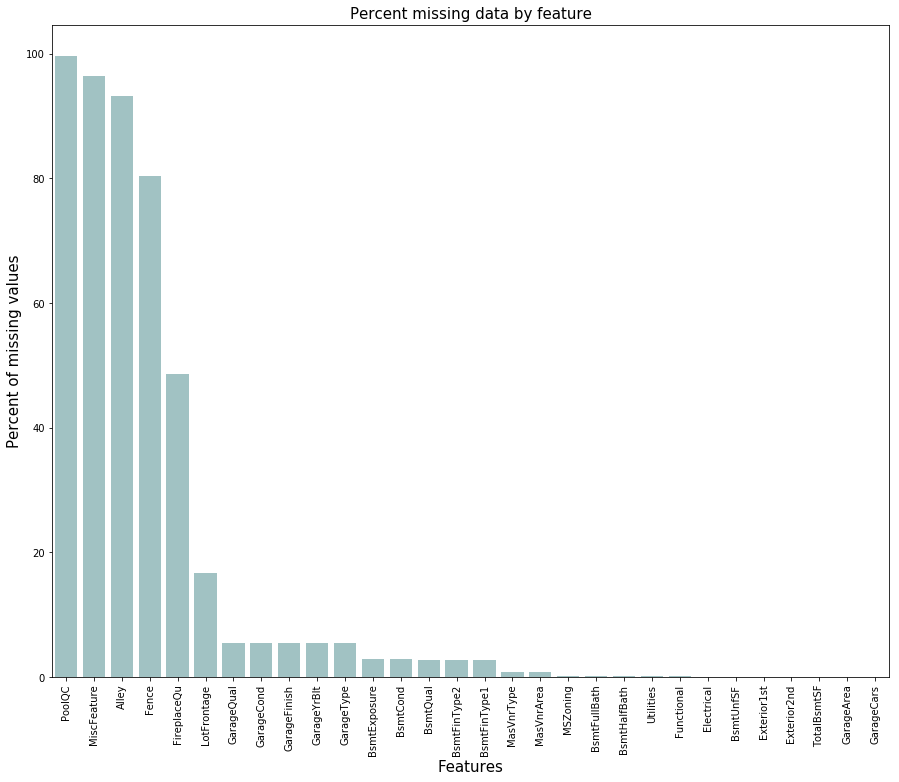

In [56]:
#create subplots
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
#create barplot
sns.barplot(x=all_data_na.index, y=all_data_na,color='#9bc7c9')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.14 check the Data Correlation using heatmap.And your observation?

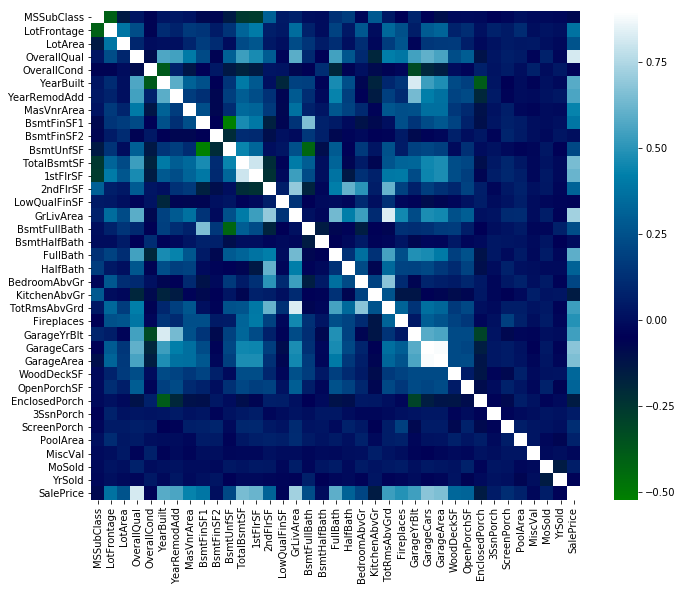

In [62]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap='ocean',linecolor='#4efc14')

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:##45a8cc"> observation:
    1. The correlation map shows the independent varialble correlating each variables.
    2. we can see here Garageyrbit, yearbuilt have green color negative correlation. 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.15 Imputing missing values

#### PoolQC : 
data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

In [63]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

#### MiscFeature : 
data description says NA means "no misc feature"

In [64]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

#### Alley : 
data description says NA means "no alley access"

In [65]:
all_data["Alley"] = all_data["Alley"].fillna("None")

Fence : 
data description says NA means "no fence"

In [66]:
all_data["Fence"] = all_data["Fence"].fillna("None")

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.16 Check remaining missing values if any 

In [67]:

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
FireplaceQu,48.680151
LotFrontage,16.660953
GarageCond,5.450806
GarageFinish,5.450806
GarageQual,5.450806


In [100]:
# FireplaceQu : data description says NA means "no fireplace"
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")


In [101]:
#LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood 
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


In [102]:
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')


In [103]:
# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)


In [104]:
## BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)


In [105]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')


In [106]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)


In [107]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])


In [92]:
#Functional : data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")


In [93]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])


In [94]:
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])


In [95]:
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])


In [96]:
#SaleType : Fill in again with most frequent which is "WD"
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])


In [97]:
#MSSubClass : Na most likely means No building class. We can replace missing values with None
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.17 Check again remaining missing values if any.And your observation?

In [98]:

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


#### observation:
    1. we can see here maissing value ratio is zero.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.18 features engeneering

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##45a8cc"> 1.18 a) Transforming some numerical variables that are really categorical

In [109]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##45a8cc"> 1.8b) label Encoding some categorical variables that may contain information in their ordering set

In [110]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##45a8cc"> 1.19 Introduction to Test and Train


In [113]:
from sklearn.model_selection import train_test_split

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.20 Extract the independent variable X and dependent variable Y?

In [115]:
all_data1 = pd.concat((train, test)).reset_index(drop=True)

In [117]:
X = all_data1.drop("SalePrice",axis=1)
Y = all_data1["SalePrice"]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.21 Split the data into train and test set(70/30)?

In [118]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 1/3, 
                                                     random_state = 0)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00ff6a"> THE END